In [17]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('data.csv', sep=';')

In [4]:
df.head()

,ID,Species,Weight (kg),Height (cm),Body Length (cm),Has Horns,Fur Color,Lays Eggs,Age (years),Gender
0,1,Deer,50.0,120,100,Yes,Brown,No,5.0,Male
1,2,Deer,45.0,115,95,No,Brown,No,4.0,Female
2,3,Chicken,2.0,30,25,No,White,Yes,2.0,Male
3,4,Chicken,1.5,28,24,No,White,Yes,1.5,Female
4,5,Lion,190.0,120,140,No,Golden,No,8.0,Male


In [5]:
# in kích thước của data_set và kiểm tra xem data_set có bao gồm bất kỳ giá trị null nào không
print(df)
df.isnull().sum()

    ID   Species  Weight (kg)  Height (cm)  Body Length (cm) Has Horns  \
0    1      Deer         50.0          120               100       Yes   
1    2      Deer         45.0          115                95        No   
2    3   Chicken          2.0           30                25        No   
3    4   Chicken          1.5           28                24        No   
4    5      Lion        190.0          120               140        No   
5    6      Lion        150.0          115               130        No   
6    7  Elephant       5000.0          300               600        No   
7    8  Elephant       4000.0          280               550        No   
8    9       Dog         25.0           60                70        No   
9   10       Dog         22.0           55                65        No   
10  11       Cat          5.0           35                45        No   
11  12       Cat          4.5           32                42        No   
12  13     Eagle          6.0         

ID                  0
Species             0
Weight (kg)         0
Height (cm)         0
Body Length (cm)    0
Has Horns           0
Fur Color           0
Lays Eggs           0
Age (years)         0
Gender              0
dtype: int64

<Axes: xlabel='Weight (kg)', ylabel='Count'>

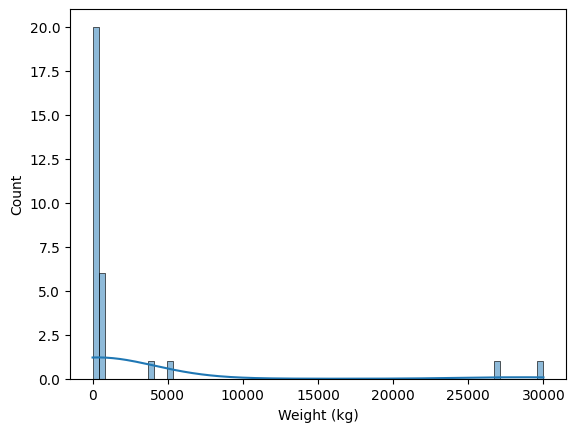

In [6]:
sns.histplot(data=df["Weight (kg)"], kde=True)


<Axes: xlabel='Height (cm)', ylabel='Count'>

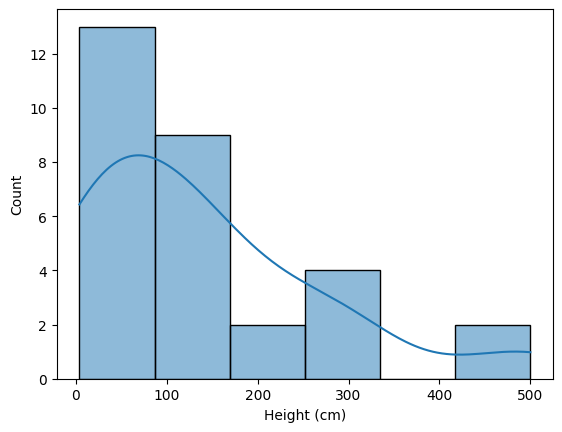

In [45]:
sns.histplot(data=df["Height (cm)"], kde=True)


<Axes: xlabel='Body Length (cm)', ylabel='Count'>

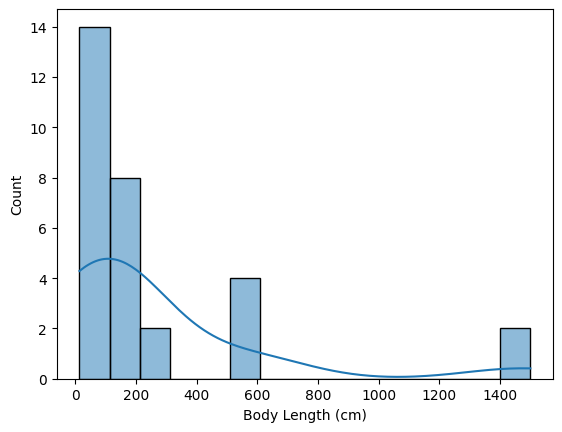

In [46]:
sns.histplot(data=df["Body Length (cm)"], kde=True)


<Axes: xlabel='Has Horns', ylabel='Count'>

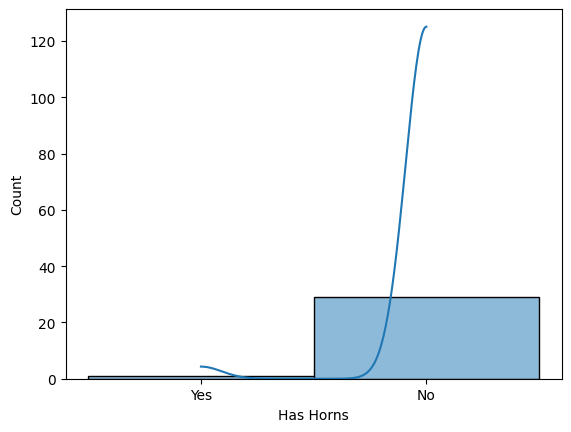

In [47]:
sns.histplot(data=df["Has Horns"], kde=True)


<Axes: xlabel='Fur Color', ylabel='Count'>

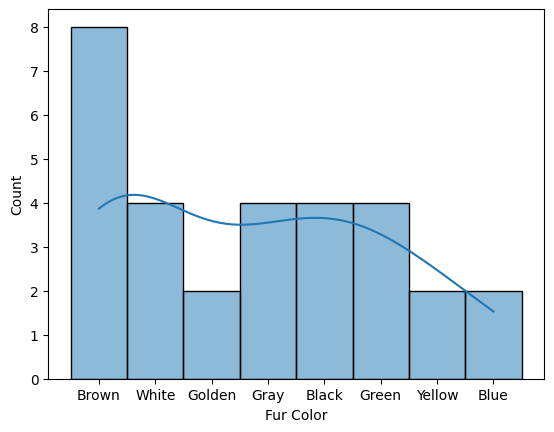

In [50]:
sns.histplot(data=df["Fur Color"], kde=True)


<Axes: xlabel='Lays Eggs', ylabel='Count'>

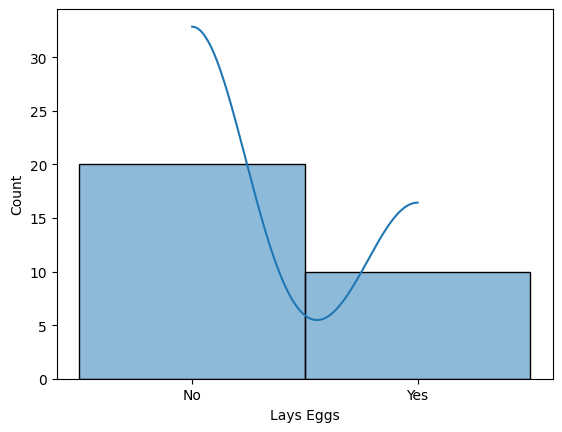

In [51]:
sns.histplot(data=df["Lays Eggs"], kde=True)


<Axes: xlabel='Age (years)', ylabel='Count'>

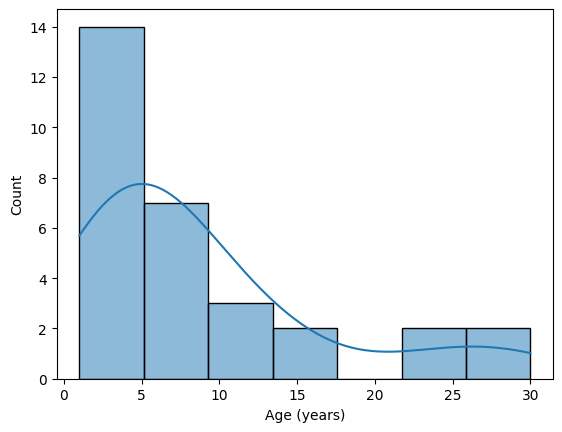

In [52]:
sns.histplot(data=df["Age (years)"], kde=True)


C:\Users\buila\AppData\Local\Temp\ipykernel_16148\1675354109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


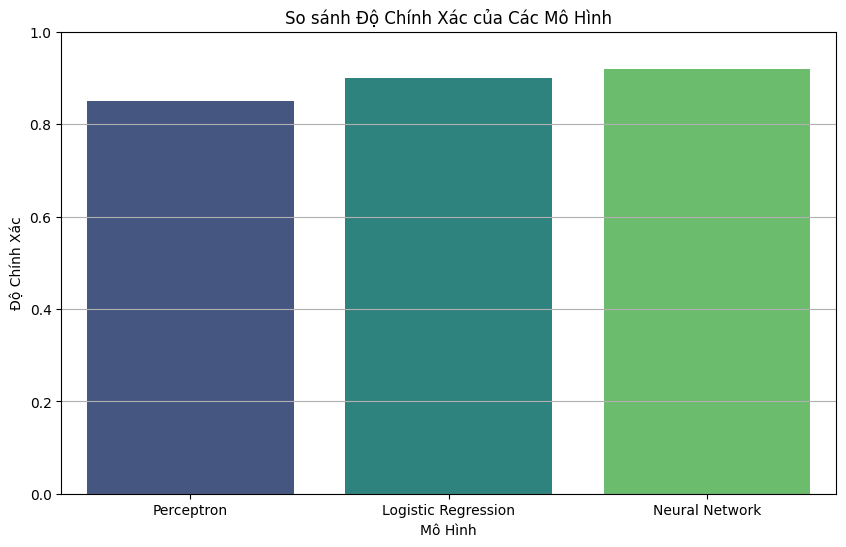

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns  

 # Giả sử bạn đã có các chỉ số độ chính xác cho từng mô hình
model_names = ['Perceptron', 'Logistic Regression', 'Neural Network']
accuracies = [0.85, 0.90, 0.92]  # Thay đổi giá trị này bằng độ chính xác thực tế của các mô hình

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.title('So sánh Độ Chính Xác của Các Mô Hình')
plt.xlabel('Mô Hình')
plt.ylabel('Độ Chính Xác')
plt.grid(axis='y')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Đọc dữ liệu từ file CSV
data = pd.read_csv('data.csv', sep=';')

# Chọn các thuộc tính và nhãn
X = data[['Weight (kg)', 'Height (cm)', 'Body Length (cm)', 'Has Horns', 'Fur Color', 'Lays Eggs', 'Age (years)']]
y = data['Gender']

# Chuyển đổi nhãn giới tính thành số
le_gender = LabelEncoder()
y = le_gender.fit_transform(y)

# Chuyển đổi các giá trị phân loại trong X thành số
label_encoders = {}
for column in ['Has Horns', 'Fur Color', 'Lays Eggs']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tiêu chuẩn hóa dữ liệu
scaler = joblib.load(r"C:\Classification\Artifact\scaler.pkl")
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình Logistic Regression
theta = joblib.load(r"C:\Classification\model\logistic_model.pkl")

# Dự đoán trên tập kiểm tra
y_pred_proba = 1 / (1 + np.exp(-np.dot(X_test, theta)))
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)  # Sử dụng 1 và 0 thay vì chuỗi

# Tính toán chỉ số accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_gender.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


NameError: name 'pd' is not defined